#  step 2-Import the data and display the head, shape and description of the data

In [41]:
import numpy as np 
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df=pd.read_csv('Documents\data-xlsx.csv')# read the csv file

In [43]:
df.head()#fetch the table ,only first 5 rows by default

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,06/01/2012 00:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,09/01/2013 00:00,present,assistant manager,Indore,m,10/04/1989 00:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,06/01/2014 00:00,present,systems engineer,Chennai,f,08/03/1992 00:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,07/01/2011 00:00,present,senior software engineer,Gurgaon,m,12/05/1989 00:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,03/01/2014 00:00,03/01/2015 00:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [44]:
df.isnull().sum()# checking for the null values

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [45]:
df.nunique()# checking the dublicates

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [46]:
df.shape# shows rows and columns

(3998, 39)

In [47]:
df=df.drop('Unnamed: 0',axis=1)# droping the unwanted column

In [48]:
df.shape# shape after dropping the column

(3998, 38)

In [49]:
df.nunique()

ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg                  23
conscienti

In [50]:
df.info()#imp step gives all info about table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   int64  
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [51]:
df['Salary'].describe()# describing the column salary

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

In [52]:
df['DOJ']=pd.to_datetime(df['DOJ'],errors='coerce')#changif the datatype
df['DOL']=pd.to_datetime(df['DOL'],errors='coerce')
df['DOB']=pd.to_datetime(df['DOB'],errors='coerce')


C:\Users\Admin\AppData\Local\Temp\ipykernel_7224\1101160453.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOL']=pd.to_datetime(df['DOL'],errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7224\1101160453.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB']=pd.to_datetime(df['DOB'],errors='coerce')


In [53]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,NaT,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,NaT,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,NaT,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,NaT,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [54]:
df.columns# return all columns names

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [55]:
categorical_columns=['Designation','JobCity','Gender','12board','10board',
                     'Degree','Specialization','CollegeState']
df[categorical_columns]=df[categorical_columns].astype('category')
# categorical columns of the table


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    2123 non-null   datetime64[ns]
 4   Designation            3998 non-null   category      
 5   JobCity                3998 non-null   category      
 6   Gender                 3998 non-null   category      
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   category      
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   category      
 13  Col

In [57]:
cities=df['JobCity'].unique()
cities

['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar', ..., 'Karad', 'Rajpura', 'Pilani', 'haryana', 'Asifabadbanglore']
Length: 339
Categories (339, object): [' Chennai', ' Delhi', ' Mumbai', ' Pune', ..., 'udaipur', 'vapi', 'vizag', 'vsakhapttnam']

In [58]:
df_cities=df.JobCity.str.strip().str.lower()
#Removes any leading and trailing whitespace from each entry in the JobCity column.
#Converts all the characters in each city name to lowercase
cities_cleaned=df['JobCity'].unique()
print(cities_cleaned)

['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar', ..., 'Karad', 'Rajpura', 'Pilani', 'haryana', 'Asifabadbanglore']
Length: 339
Categories (339, object): [' Chennai', ' Delhi', ' Mumbai', ' Pune', ..., 'udaipur', 'vapi', 'vizag', 'vsakhapttnam']


In [59]:
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
print(numerical_columns)

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    2123 non-null   datetime64[ns]
 4   Designation            3998 non-null   category      
 5   JobCity                3998 non-null   category      
 6   Gender                 3998 non-null   category      
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   category      
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   category      
 13  Col

In [61]:
df.shape

(3998, 38)

# Step - 3 - Univariate Analysis

In [62]:
sns.set(style='whitegrid')#using seaborn for univariate analysis

In [63]:
def find_outliers(df_column):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[(df[col]<lower_bound)|(df[col]>upper_bound)]#finding outliers

In [64]:
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
print(numerical_columns)#casting

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')


In [65]:
numerical_col=['Salary', '10percentage', '12percentage','collegeGPA','English', 'Logical', 
        'Quant','Domain','ComputerProgramming', 'ElectronicsAndSemicon','ComputerScience', 
        'MechanicalEngg', 'ElectricalEngg','TelecomEngg','CivilEngg', 'conscientiousness',
        'agreeableness', 'extraversion','nueroticism','openess_to_experience']#numerical columns of table

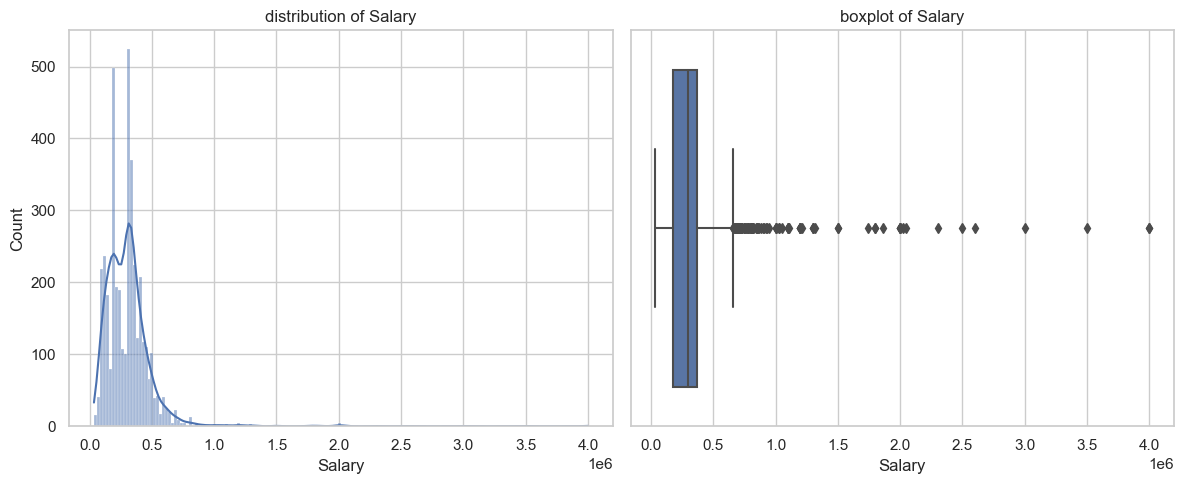

outliers in Salary:
           ID   Salary        DOJ        DOL                 Designation  \
3      267447  1100000 2011-07-01        NaT    senior software engineer   
76     361583   800000 2012-06-01        NaT           software engineer   
92    1250429  1500000 2014-11-01 2014-07-01       application developer   
123    312164  1200000 2010-07-01 2011-07-01            engineer trainee   
128    206734   675000 2011-11-01        NaT    senior software engineer   
...       ...      ...        ...        ...                         ...   
3823   918568   775000 2014-08-01        NaT  mechanical design engineer   
3904   267121   850000 2011-09-01        NaT        operations assistant   
3912   231229   730000 2013-07-01        NaT          research scientist   
3961   230702   700000 2011-07-01 2014-09-01           planning engineer   
3992   344407   800000 2014-04-01 2015-04-01                     manager   

          JobCity Gender        DOB  10percentage                10

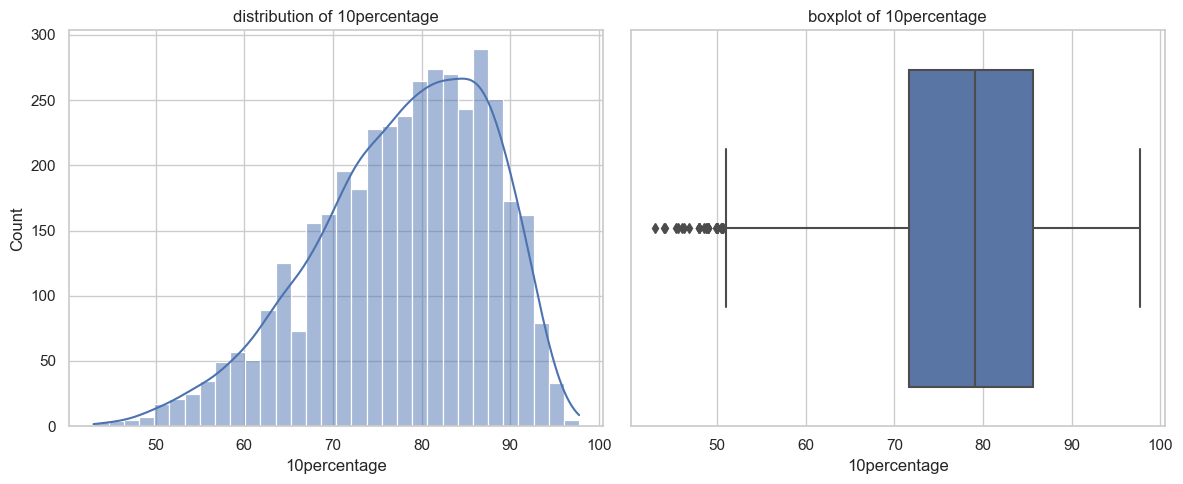

outliers in 10percentage:
           ID  Salary        DOJ        DOL                  Designation  \
245    984958  285000 2014-08-01 2015-04-01   technical support engineer   
466   1245184  215000 2015-01-01 2015-04-01           software developer   
490    302937  150000 2011-07-01 2012-11-01              design engineer   
491     53838  100000 2010-05-01 2011-01-01           software developer   
502   1160766  240000 2015-01-01 2015-04-01    electrical field engineer   
600    918414  200000 2008-11-01 2012-11-01             project engineer   
613    228081  440000 2013-05-01        NaT           operations manager   
898    212005  270000 2013-03-01        NaT            asp.net developer   
919   1231953  450000 2014-07-01 2015-06-01              system engineer   
1064   277260  250000 2011-09-01 2014-12-01               .net developer   
1102   311098  120000 2012-12-01 2015-01-01               .net developer   
1169   179878  105000 2011-01-01 2011-06-01             softwa

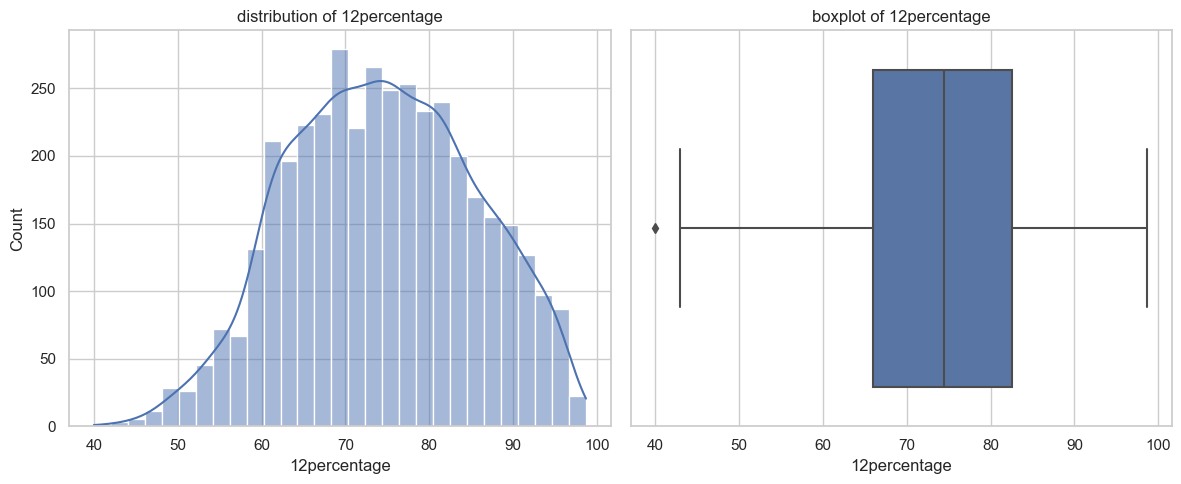

outliers in 12percentage:
          ID  Salary        DOJ        DOL           Designation    JobCity  \
3337  258677  300000 2010-09-01 2014-06-01  system administrator  Hyderabad   

     Gender        DOB  10percentage 10board  ...  ComputerScience  \
3337      m 1984-06-21          74.0       0  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
3337              -1             -1           -1         -1            -0.881   

     agreeableness  extraversion  nueroticism  openess_to_experience  
3337        0.0328       -1.5051      -0.2902                -0.9194  

[1 rows x 38 columns]


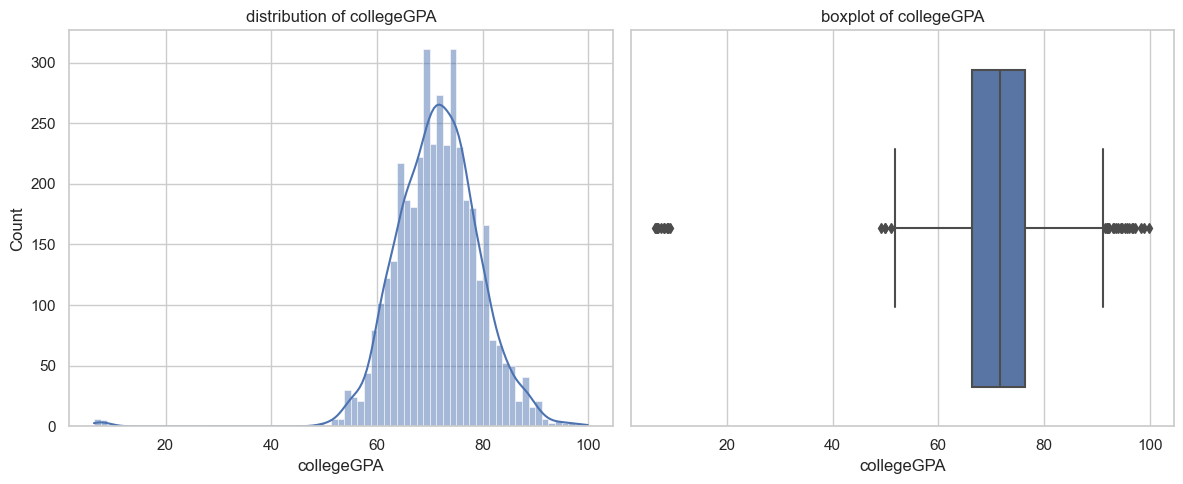

outliers in collegeGPA:
           ID   Salary        DOJ        DOL                     Designation  \
7      912934   400000 2014-07-01 2015-07-01             mechanical engineer   
44     247617   380000 2012-05-01 2015-04-01              programmer analyst   
138    964319   195000 2014-10-01 2015-01-01  business development managerde   
187    336792   410000 2013-02-01        NaT              programmer analyst   
477    345838   225000 2013-06-01 2015-04-01     linux systems administrator   
614    237941   655000 2011-07-01        NaT        senior software engineer   
690    609356   440000 2013-10-01 2015-04-01              software developer   
788    249853   180000 2012-05-01 2013-06-01     electrical project engineer   
874    337594   400000 2013-02-01 2015-04-01              programmer analyst   
907    324190   100000 2013-02-01 2014-04-01             production engineer   
1029   337629   300000 2013-04-01 2015-04-01                  java developer   
1134    56871   

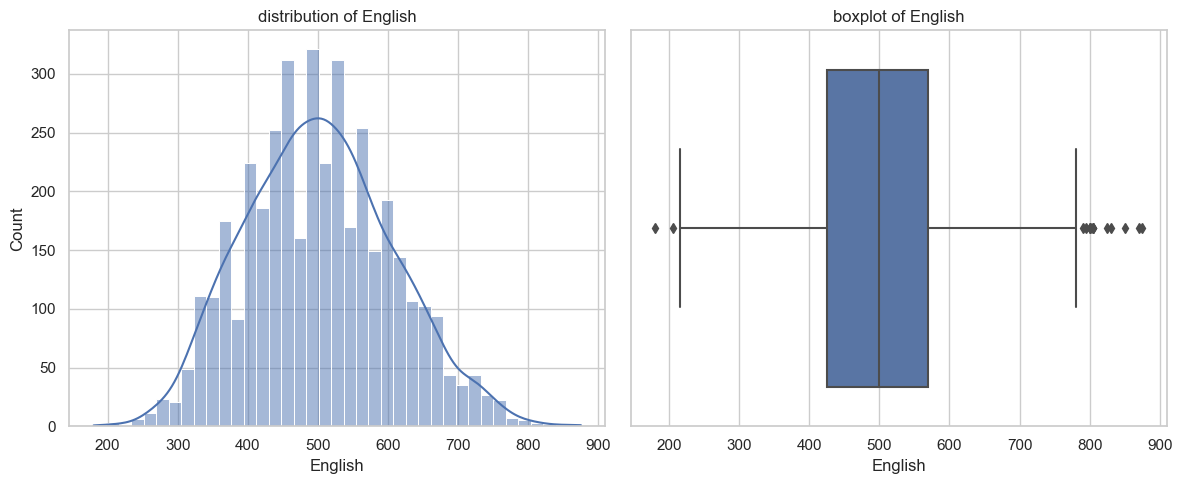

outliers in English:
           ID  Salary        DOJ        DOL                      Designation  \
275   1023622  305000 2014-08-01        NaT                software engineer   
444    283164  715000 2012-01-01        NaT                  senior engineer   
668    609043  440000 2013-10-01        NaT                software engineer   
839    693533  315000 2013-08-01 2015-02-01                hardware engineer   
847    608938  600000 2013-07-01 2014-06-01                          manager   
935    513149  150000 2012-09-01 2013-08-01                asp.net developer   
1183  1083037  310000 2014-09-01        NaT  quality assurance test engineer   
1217   669692  600000 2014-10-01 2015-02-01                assistant manager   
1450  1284437  200000 2015-01-01 2015-07-01             web designer and seo   
1519   984550  320000 2014-10-01        NaT                software engineer   
2077   922684  305000 2014-09-01 2015-04-01               programmer analyst   
2122   605290  1800

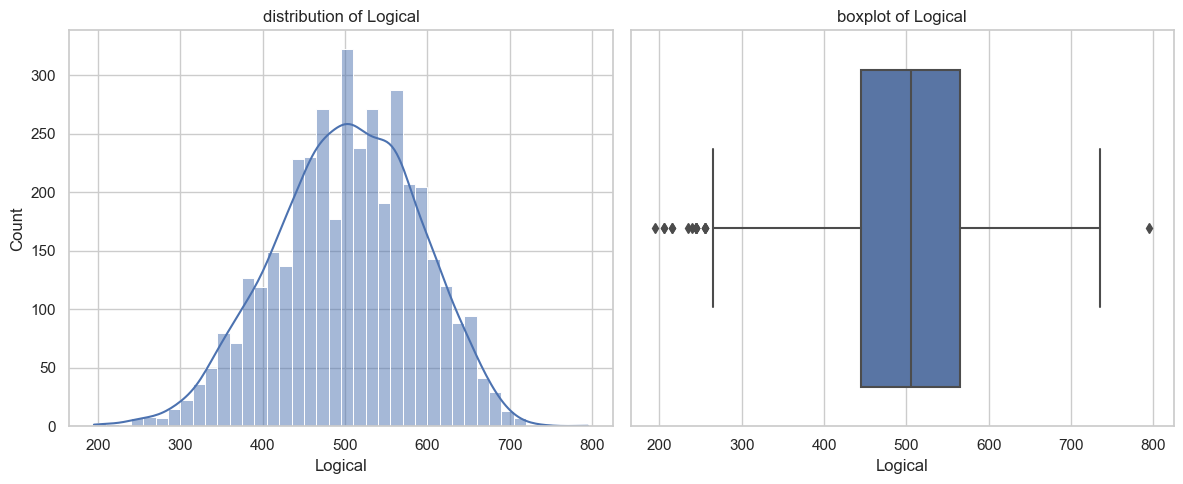

outliers in Logical:
           ID  Salary        DOJ        DOL               Designation  \
101     43693  205000 2011-12-01        NaT       electrical engineer   
133    434552  300000 2014-06-01 2015-04-01     marketing coordinator   
207    457244  360000 2013-04-01        NaT         software engineer   
345     60315  110000 2011-07-01 2012-05-01      maintenance engineer   
628     47805  505000 2010-12-01 2014-06-01  senior software engineer   
1014   649530  350000 2014-02-01        NaT           system engineer   
1160    65483  325000 2012-04-01        NaT    software test engineer   
1439   299447  360000 2011-08-01        NaT       assistant professor   
2141   340045  100000 2013-04-01 2013-09-01        software developer   
2265   126975  300000 2010-09-01 2013-10-01           senior engineer   
2796  1087183  100000 2015-02-01 2015-03-01        software developer   
2830   133458  150000 2010-10-01 2011-12-01    maintenance supervisor   
2891   205633  500000 2011-09-

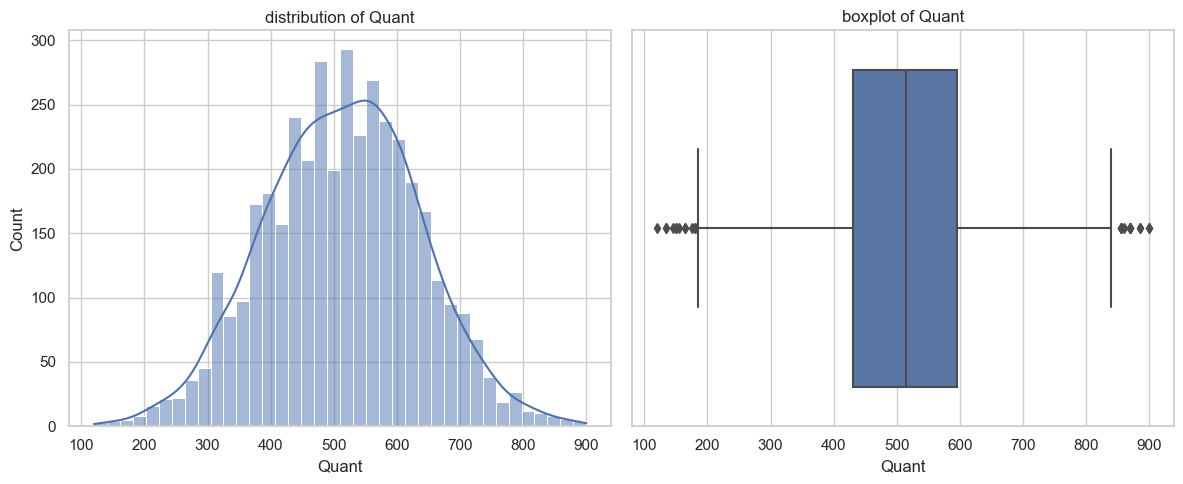

outliers in Quant:
           ID  Salary        DOJ        DOL  \
195    863466  350000 2013-11-01 2014-07-01   
522    640774   55000 2014-02-01 2014-05-01   
564    558050  185000 2012-08-01 2015-08-01   
698   1122860  300000 2014-08-01        NaT   
783   1262957  190000 2013-11-01 2015-01-01   
899    602267  320000 2014-09-01        NaT   
1148  1145718  100000 2014-11-01 2015-01-01   
1310   596083  450000 2014-08-01        NaT   
1661   591405  605000 2013-09-01        NaT   
1815   806357  205000 2014-07-01 2015-06-01   
2007   637441  350000 2013-10-01 2015-04-01   
2134   602029  150000 2014-10-01 2015-09-01   
2155   900799  320000 2014-05-01        NaT   
2411   655464  390000 2013-07-01        NaT   
2437   489860  120000 2014-03-01 2015-03-01   
2490   595163   80000 2013-08-01 2014-02-01   
2616   730091   80000 2014-05-01 2015-04-01   
2932   624843  110000 2014-04-01 2014-09-01   
2957   510199  770000 2012-07-01        NaT   
2988   606571  500000 2013-07-01        N

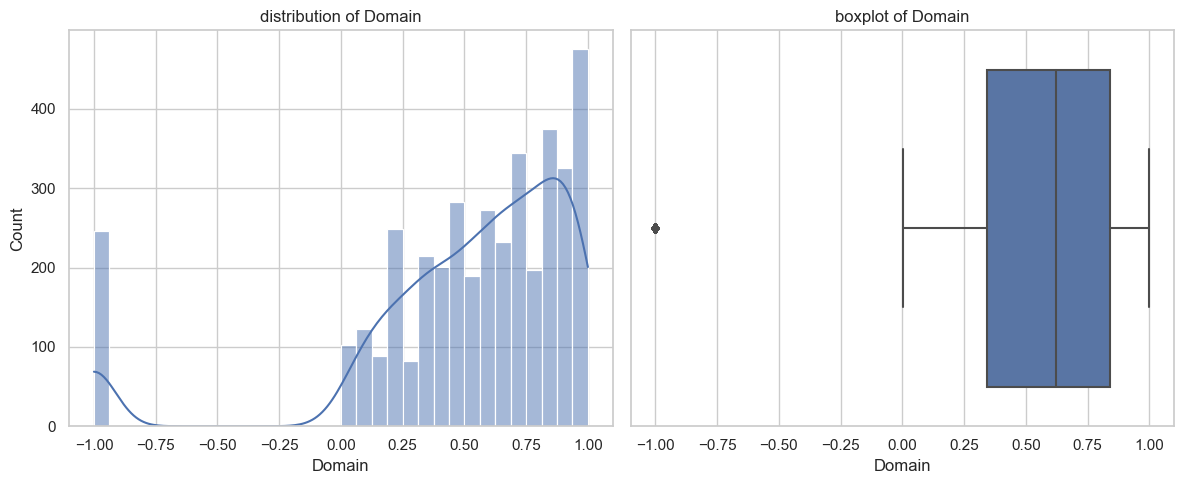

outliers in Domain:
           ID  Salary        DOJ        DOL                   Designation  \
5     1027655  300000 2014-06-01        NaT               system engineer   
14    1279958  300000 2013-07-01        NaT        java software engineer   
16    1087625  325000 2014-09-01        NaT  product development engineer   
22     995191  190000 2013-10-01 2015-04-01                     developer   
35     942679  350000 2014-03-01        NaT      online marketing manager   
...       ...     ...        ...        ...                           ...   
3942  1067015  280000 2013-07-01        NaT             software engineer   
3958  1039020  310000 2014-06-01        NaT             software engineer   
3960  1037712  240000 2013-08-01 2014-01-01                 web developer   
3969  1233826  330000 2015-06-01        NaT            technical engineer   
3978  1274658  320000 2013-08-01 2014-01-01             software engineer   

        JobCity Gender        DOB  10percentage      10

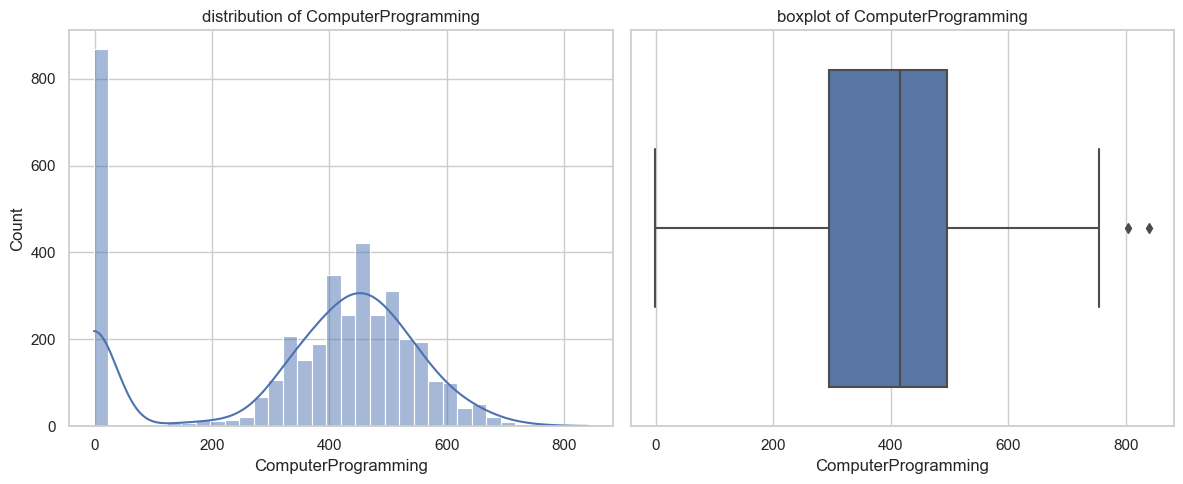

outliers in ComputerProgramming:
          ID  Salary        DOJ        DOL             Designation  JobCity  \
64     31330  600000 2010-07-01 2012-07-01  java software engineer  Gurgaon   
1711  712570  625000 2014-02-01        NaT            data analyst       -1   

     Gender        DOB  10percentage      10board  ...  ComputerScience  \
64        m 1986-05-29          78.0         cbse  ...               -1   
1711      m 1990-06-24          88.0  state board  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg conscientiousness  \
64                -1             -1           -1         -1            0.6646   
1711             233             -1           -1         -1           -0.7335   

     agreeableness  extraversion  nueroticism  openess_to_experience  
64          0.3448        0.8171       0.6498                 0.0284  
1711       -0.7866       -0.4511      -1.5021                -1.8189  

[2 rows x 38 columns]


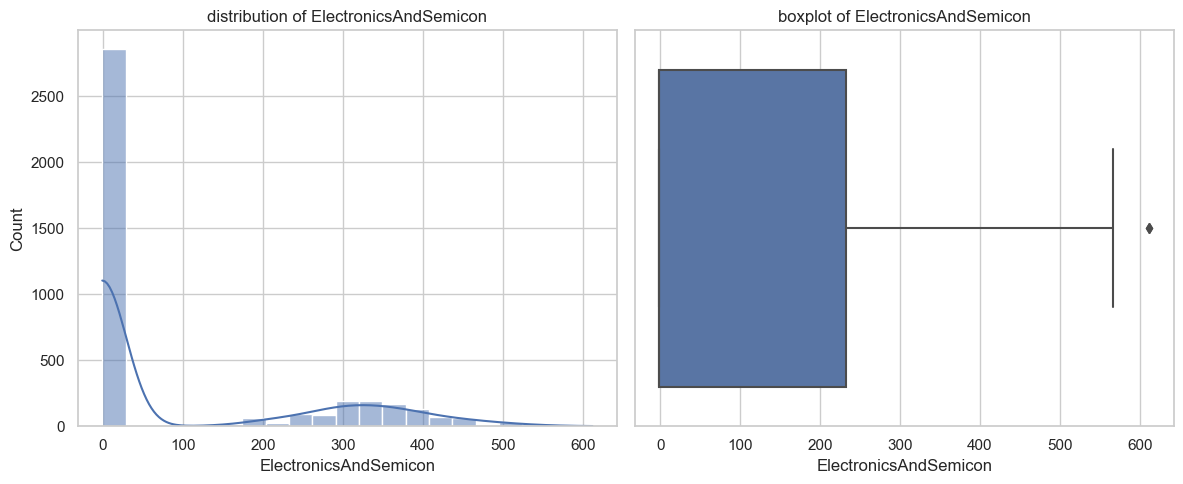

outliers in ElectronicsAndSemicon:
           ID  Salary        DOJ        DOL              Designation  \
1557  1157412  350000 2014-07-01 2015-04-01         systems engineer   
3889  1062520  325000 2014-10-01        NaT  assistant store manager   

        JobCity Gender        DOB  10percentage      10board  ...  \
1557  Hyderabad      f 1992-08-11          84.4         cbse  ...   
3889    Chennai      m 1993-08-28          93.4  state board  ...   

      ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
1557               -1              -1            580           -1         -1   
3889               -1              -1             -1           -1         -1   

     conscientiousness agreeableness  extraversion  nueroticism  \
1557            1.8517        1.0449         0.010      -2.3895   
3889            0.1282        0.3789        -1.527      -0.8682   

      openess_to_experience  
1557                 0.8637  
3889                -0.6692  

[2 row

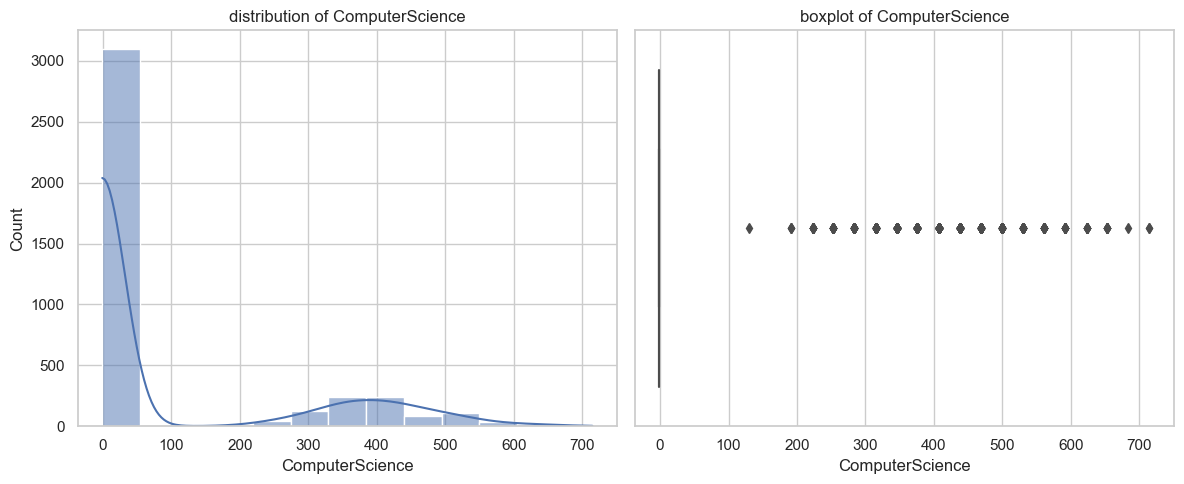

outliers in ComputerScience:
           ID  Salary        DOJ        DOL                   Designation  \
5     1027655  300000 2014-06-01        NaT               system engineer   
6      947847  300000 2014-08-01 2015-05-01        java software engineer   
14    1279958  300000 2013-07-01        NaT        java software engineer   
17     874596  250000 2013-08-01 2014-09-01  associate software developer   
24     963123  335000 2014-06-01 2015-06-01            programmer analyst   
...       ...     ...        ...        ...                           ...   
3972  1044603  180000 2015-03-01 2015-05-01             help desk analyst   
3976  1006997  300000 2015-01-01        NaT     graduate engineer trainee   
3981  1077872  220000 2014-09-01        NaT             software engineer   
3989  1204604  300000 2014-09-01        NaT             software engineer   
3996   947111  200000 2014-07-01 2015-01-01            software developer   

               JobCity Gender        DOB  10pe

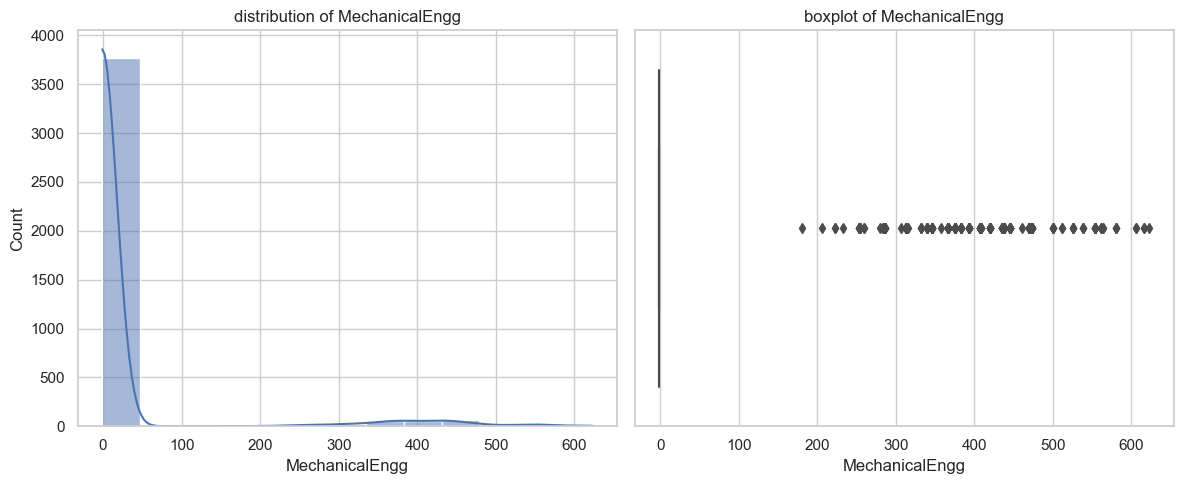

outliers in MechanicalEngg:
           ID  Salary        DOJ        DOL               Designation  \
7      912934  400000 2014-07-01 2015-07-01       mechanical engineer   
26      65096  345000 2011-01-01 2013-10-01  senior software engineer   
40     245887  120000 2011-06-01 2012-03-01              site manager   
45    1230582  110000 2014-09-01 2015-01-01       production engineer   
59     536053  120000 2009-09-01 2013-04-01         software engineer   
...       ...     ...        ...        ...                       ...   
3909   628271  210000 2013-08-01        NaT       production engineer   
3916   530146  360000 2013-06-01 2014-12-01        management trainee   
3929   336937  100000 2012-06-01 2014-04-01              cad designer   
3951   885459  145000 2014-05-01        NaT       mechanical engineer   
3980   197796  150000 2011-07-01 2012-07-01                       get   

          JobCity Gender        DOB  10percentage  \
7       Bangalore      m 1992-05-27       

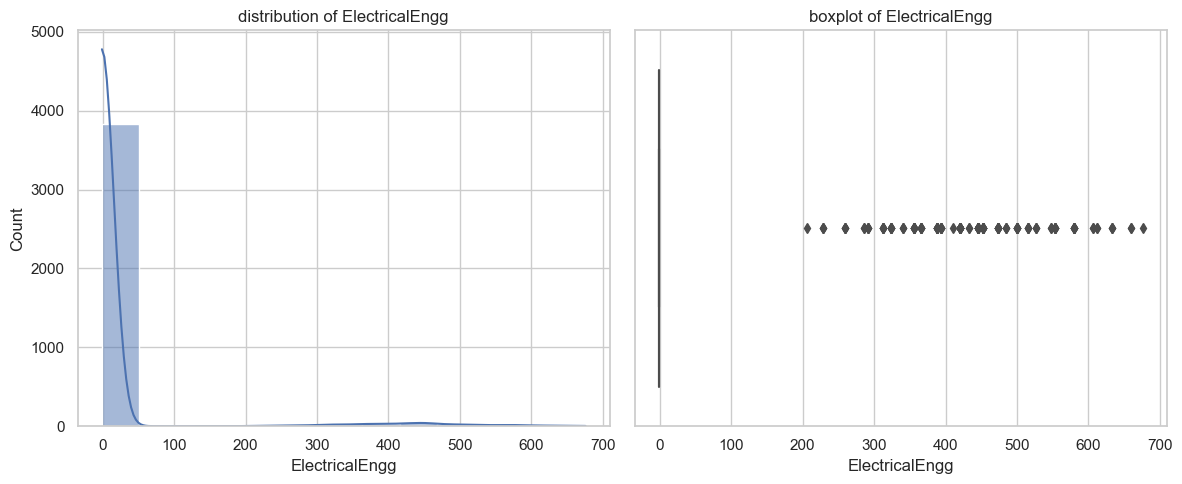

outliers in ElectricalEngg:
           ID  Salary        DOJ        DOL                Designation  \
53    1082717  350000 2014-09-01        NaT  assistant system engineer   
70     801755  320000 2014-03-01        NaT            system engineer   
124    614524  315000 2014-11-01        NaT         programmer analyst   
125    796063  300000 2014-11-01 2015-03-01         programmer analyst   
180    639785  180000 2013-09-01 2014-04-01            design engineer   
...       ...     ...        ...        ...                        ...   
3832   625434  565000 2013-10-01 2015-04-01                   engineer   
3835  1081640  100000 2014-04-01 2015-02-01           project engineer   
3837   898548  350000 2014-12-01        NaT      application developer   
3839   644828  360000 2013-09-01        NaT                        ase   
3844  1219891  200000 2015-01-01 2015-06-01        electrical engineer   

          JobCity Gender        DOB  10percentage      10board  ...  \
53         M

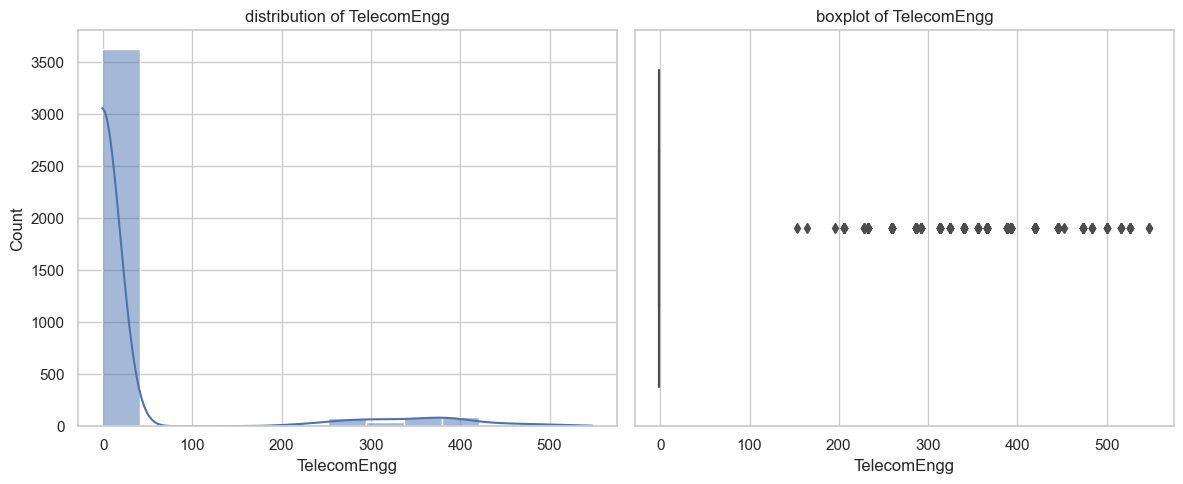

outliers in TelecomEngg:
           ID  Salary        DOJ        DOL                    Designation  \
12     606655  270000 2013-12-01        NaT     quality assurance engineer   
28     918981  145000 2015-02-01 2015-04-01     telecommunication engineer   
57     294700  525000 2012-03-01        NaT                  test engineer   
62    1218578  145000 2014-06-01        NaT                       engineer   
81     661546  280000 2014-10-01 2015-04-01                        faculty   
...       ...     ...        ...        ...                            ...   
3937   385546  205000 2012-10-01 2014-02-01            production engineer   
3938   340205  300000 2014-05-01        NaT     desktop support technician   
3954   531726  310000 2014-04-01 2015-04-01  business intelligence analyst   
3990   204287  480000 2012-02-01        NaT        senior systems engineer   
3991   230873  630000 2011-07-01 2014-10-01                systems analyst   

        JobCity Gender        DOB  10p

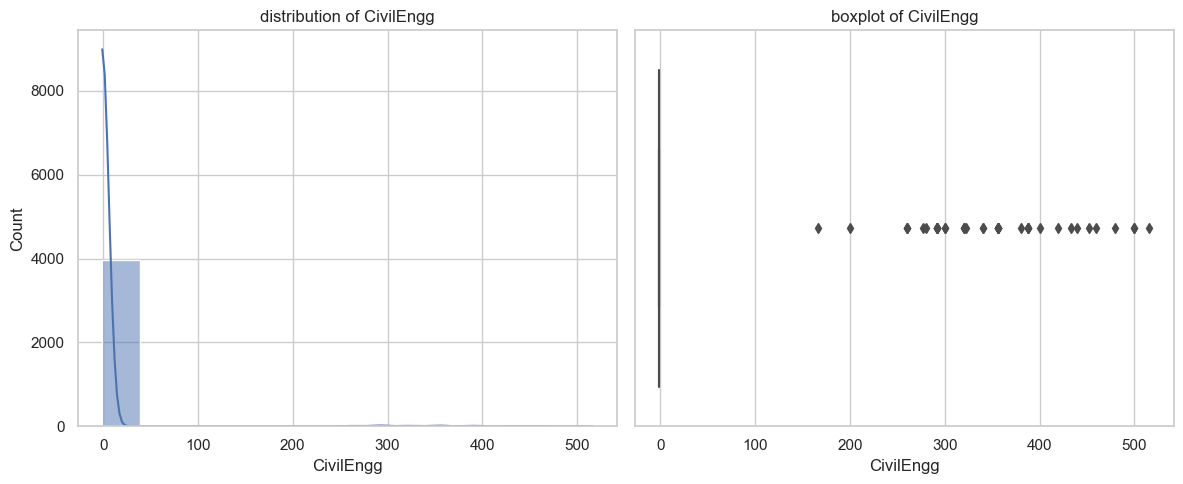

outliers in CivilEngg:
           ID  Salary        DOJ        DOL                   Designation  \
26      65096  345000 2011-01-01 2013-10-01      senior software engineer   
59     536053  120000 2009-09-01 2013-04-01             software engineer   
172   1089283  110000 2014-06-01 2015-02-01           assistant professor   
211     46302  350000 2010-10-01 2013-05-01          maintenance engineer   
222    226736  100000 2013-03-01 2013-06-01                    programmer   
331    341114  700000 2014-04-01        NaT             assistant manager   
403    795799  405000 2014-07-01        NaT             planning engineer   
453   1253724  300000 2015-06-01        NaT             software engineer   
492    795862  525000 2014-09-01        NaT              business analyst   
493    609066  720000 2014-02-01        NaT                  data analyst   
505    112626  500000 2011-08-01        NaT          application engineer   
605    319130  350000 2012-06-01 2015-04-01        so

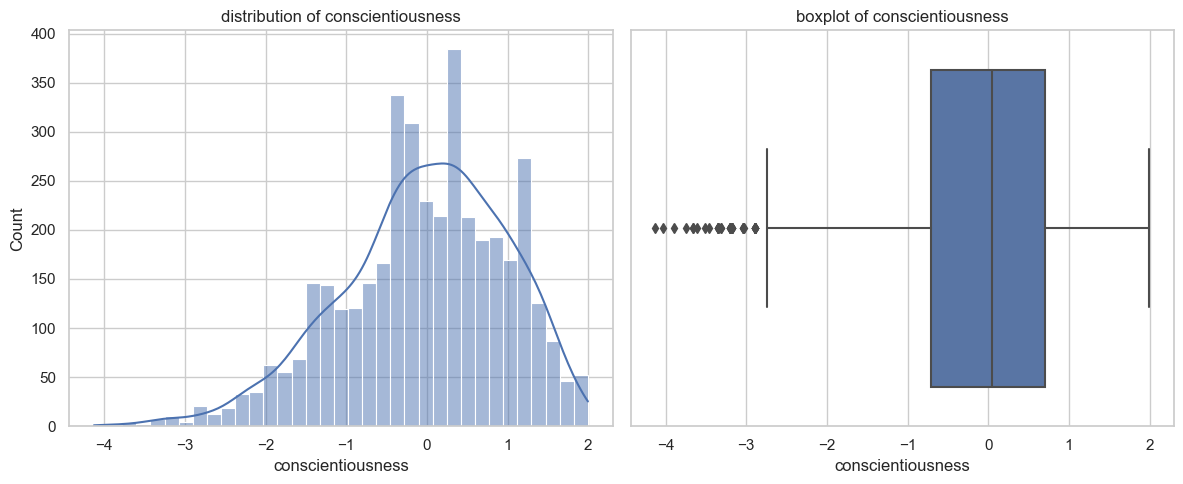

outliers in conscientiousness:
           ID   Salary        DOJ        DOL  \
29     472956   220000 2014-11-01 2014-04-01   
159    755080   340000 2014-06-01 2015-04-01   
210     30739   310000 2010-09-01 2012-03-01   
315    232430   360000 2012-05-01        NaT   
335   1042343   120000 2014-02-01        NaT   
373    215639   370000 2014-03-01        NaT   
382     50739   260000 2011-03-01        NaT   
408   1175511   280000 2015-02-01 2015-07-01   
468   1073243   240000 2013-07-01        NaT   
523   1061906   120000 2014-03-01 2015-04-01   
1211   632729   420000 2013-08-01        NaT   
1337   355018   285000 2013-02-01        NaT   
1353   578644   350000 2013-06-01        NaT   
1684   455020   450000 2013-03-01        NaT   
1687   326762   450000 2013-03-01 2015-03-01   
1972   228051   605000 2012-05-01 2014-12-01   
2005   225959   395000 2013-09-01        NaT   
2046   309046   250000 2014-02-01 2015-01-01   
2101   358268   450000 2013-03-01        NaT   
2182    4

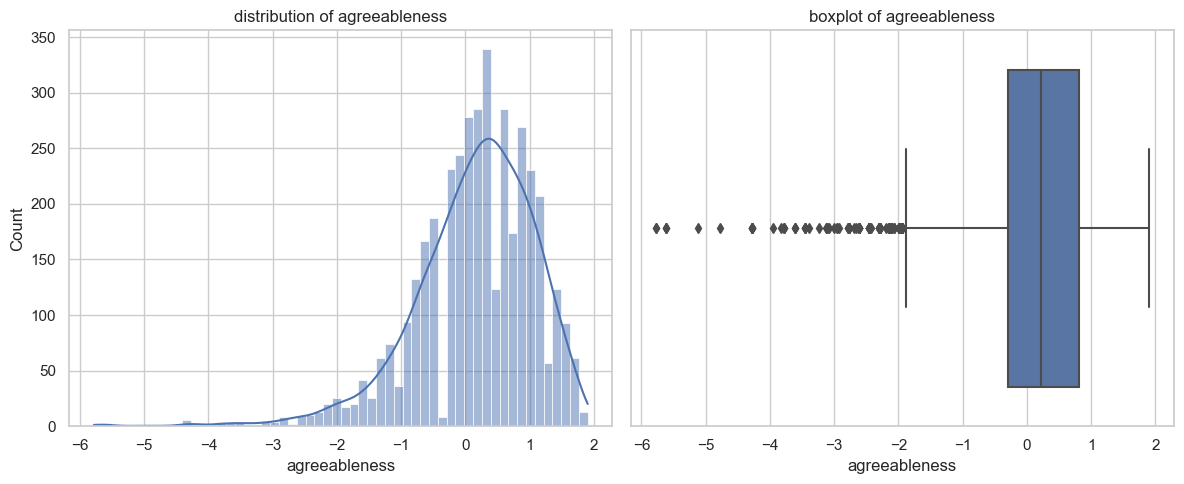

outliers in agreeableness:
           ID  Salary        DOJ        DOL                  Designation  \
23     990077  180000 2014-08-01 2015-04-01  electrical project engineer   
43    1207660  120000 2014-04-01 2015-04-01               .net developer   
63     636871  150000 2014-10-01 2015-04-01           management trainee   
67     810433  400000 2014-08-01 2015-02-01                test engineer   
157    728009  405000 2013-08-01        NaT              system engineer   
...       ...     ...        ...        ...                          ...   
3843   661427  240000 2013-08-01 2013-08-01                test engineer   
3855   530061  300000 2014-09-01        NaT             engineer trainee   
3878   663824  260000 2013-10-01        NaT            software engineer   
3939   716325  100000 2013-07-01 2014-12-01            software engineer   
3953   331779  160000 2013-05-01        NaT       software test engineer   

         JobCity Gender        DOB  10percentage      10boar

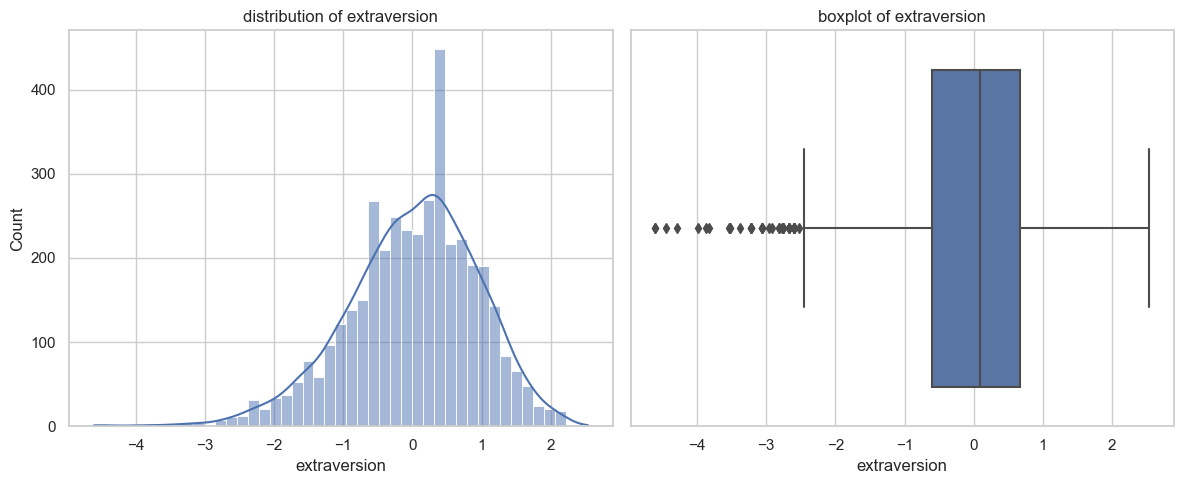

outliers in extraversion:
           ID  Salary        DOJ        DOL                   Designation  \
63     636871  150000 2014-10-01 2015-04-01            management trainee   
159    755080  340000 2014-06-01 2015-04-01             asp.net developer   
335   1042343  120000 2014-02-01        NaT           electrical engineer   
408   1175511  280000 2015-02-01 2015-07-01                  web designer   
523   1061906  120000 2014-03-01 2015-04-01     junior software developer   
666    820152  110000 2014-01-01        NaT            software developer   
726    471413  480000 2013-07-01 2015-04-01        java software engineer   
1169   179878  105000 2011-01-01 2011-06-01              software trainee   
1211   632729  420000 2013-08-01        NaT       senior network engineer   
1217   669692  600000 2014-10-01 2015-02-01             assistant manager   
1242   319644  395000 2012-06-01 2015-04-01              project engineer   
1353   578644  350000 2013-06-01        NaT     qu

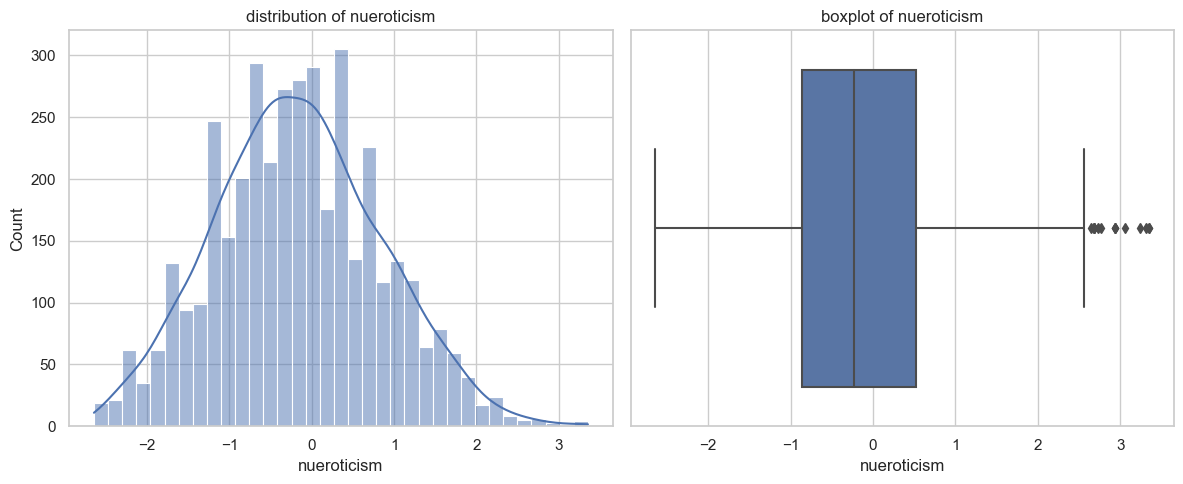

outliers in nueroticism:
           ID  Salary        DOJ        DOL                 Designation  \
222    226736  100000 2013-03-01 2013-06-01                  programmer   
405    601563  145000 2013-10-01 2014-07-01             sales executive   
1151   346395  140000 2012-07-01 2014-01-01           software engineer   
1191   356498  445000 2013-03-01 2015-05-01             system engineer   
1383   349752  550000 2012-06-01        NaT           assistant manager   
1602   862240  180000 2014-04-01 2015-04-01      software test engineer   
1843   843714  280000 2013-08-01        NaT      software test engineer   
2054   348114  335000 2013-07-01        NaT            systems engineer   
2234   530441  360000 2014-02-01        NaT  project management officer   
2275  1052796  100000 2014-01-01        NaT          software developer   
2608   914037  180000 2014-10-01 2015-01-01           asp.net developer   
2859  1152368  180000 2014-01-01 2015-02-01        salesforce developer   


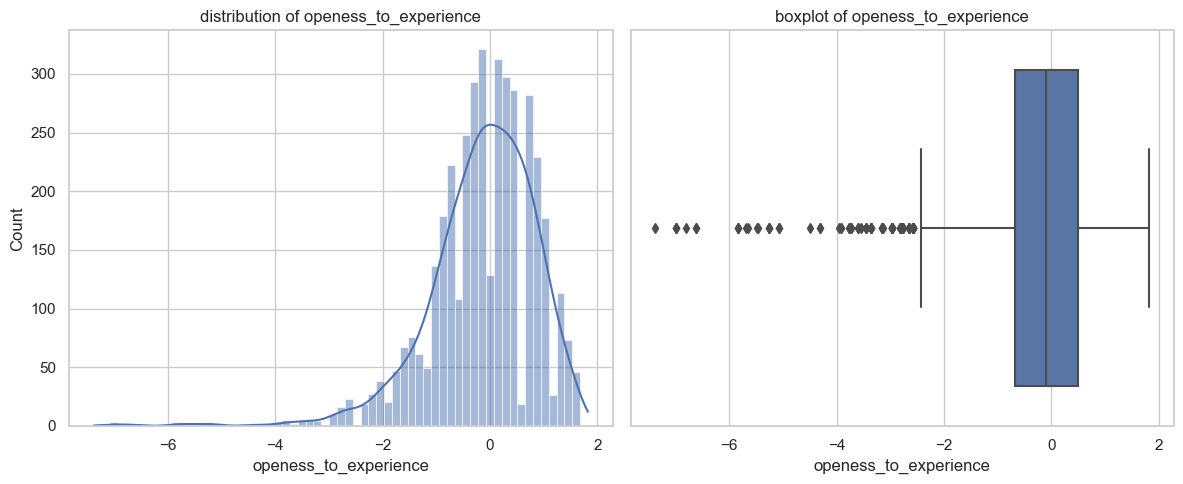

outliers in openess_to_experience:
           ID  Salary        DOJ        DOL                     Designation  \
22     995191  190000 2013-10-01 2015-04-01                       developer   
23     990077  180000 2014-08-01 2015-04-01     electrical project engineer   
43    1207660  120000 2014-04-01 2015-04-01                  .net developer   
63     636871  150000 2014-10-01 2015-04-01              management trainee   
128    206734  675000 2011-11-01        NaT        senior software engineer   
...       ...     ...        ...        ...                             ...   
3868   618243  320000 2013-06-01        NaT                project engineer   
3892  1089287  300000 2014-08-01        NaT          manufacturing engineer   
3901   677204  390000 2013-07-01 2015-04-01  software engineering associate   
3918   988486  120000 2014-08-01        NaT            system administrator   
3957   425242  180000 2012-09-01 2013-10-01           network administrator   

         JobCity

In [66]:
for col in numerical_col:
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True)
    plt.title(f"distribution of {col}")
    plt.xlabel(col)

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()
    
    outliers=find_outliers(col)
    print(f"outliers in {col}:")
    print(outliers)
# graphical reprsentation of each column
  
    
    

<Axes: xlabel='Gender', ylabel='count'>

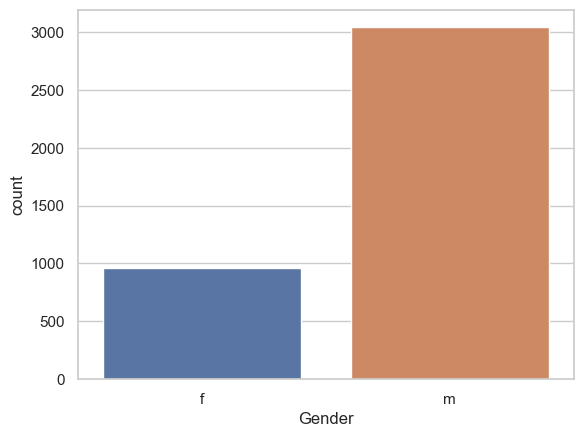

In [67]:
sns.countplot(x=df['Gender']) #comparing the two values of categorical column

In [68]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

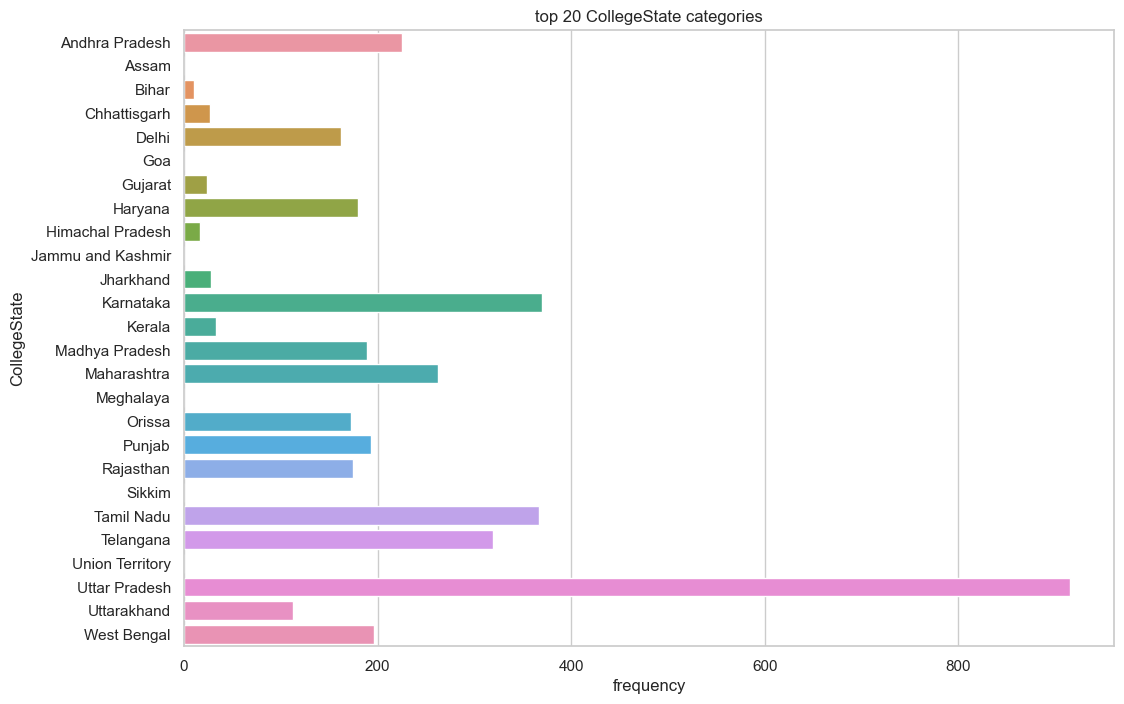

In [69]:
top_CollegeState=df['CollegeState'].value_counts().nlargest(20)
plt.figure(figsize=(12,8))
sns.countplot(y="CollegeState",data=df[df["CollegeState"]
    .isin(top_CollegeState.index)])
plt.title("top 20 CollegeState categories")
plt.xlabel('frequency')
plt.ylabel('CollegeState')
plt.tight_layout
plt.show()#output of the states showing the frequency

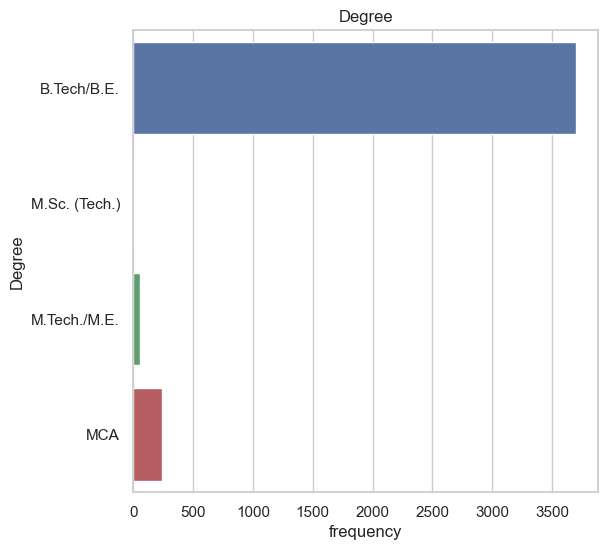

In [70]:
top_CollegeState=df['Degree'].value_counts().nlargest(20)
plt.figure(figsize=(6,6))
sns.countplot(y="Degree",data=df[df["Degree"]
    .isin(top_CollegeState.index)])
plt.title("Degree")
plt.xlabel('frequency')
plt.ylabel('Degree')
plt.tight_layout
plt.show()#showing the frequency per degree

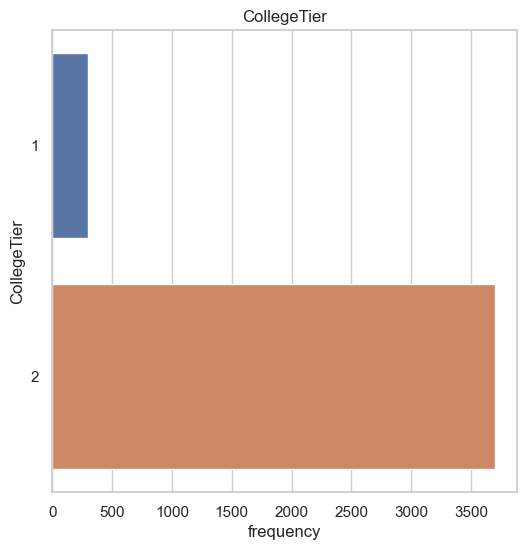

In [71]:
top_CollegeState=df['CollegeTier'].value_counts().nlargest(20)
plt.figure(figsize=(6,6))
sns.countplot(y="CollegeTier",data=df[df["CollegeTier"]
    .isin(top_CollegeState.index)])
plt.title("CollegeTier")
plt.xlabel('frequency')
plt.ylabel('CollegeTier')
plt.tight_layout
plt.show()

# Step - 4 - Bivariate Analysis

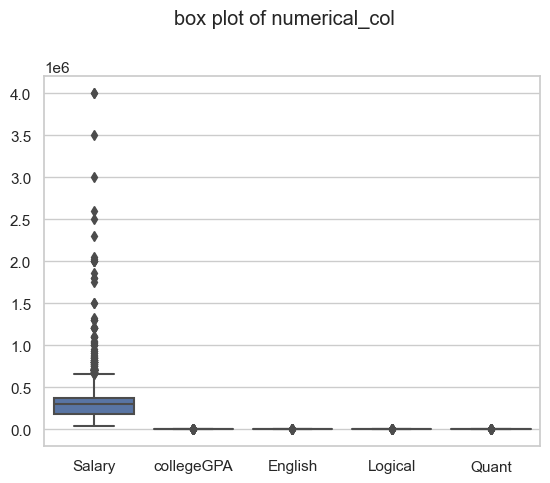

In [72]:
numerical_col=['Salary','collegeGPA','English', 'Logical',
        'Quant']
sns.set(style="whitegrid")
pair_plot=sns.boxplot(df[numerical_col])
plt.suptitle('box plot of numerical_col',y=1.02)
plt.subplots_adjust(hspace=0.10,wspace=0.6)
plt.show()

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120')])

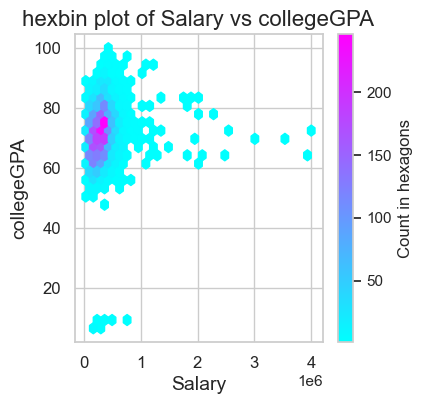

In [73]:
x_column='Salary'
y_column='collegeGPA'
plt.figure(figsize=(4,4))
plt.hexbin(df[x_column],df[y_column],gridsize=30,cmap='cool',mincnt=1)
plt.colorbar(label='Count in hexagons')
plt.title(f"hexbin plot of {x_column} vs {y_column}",fontsize=16)
plt.xlabel(x_column,fontsize=14)
plt.ylabel(y_column,fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

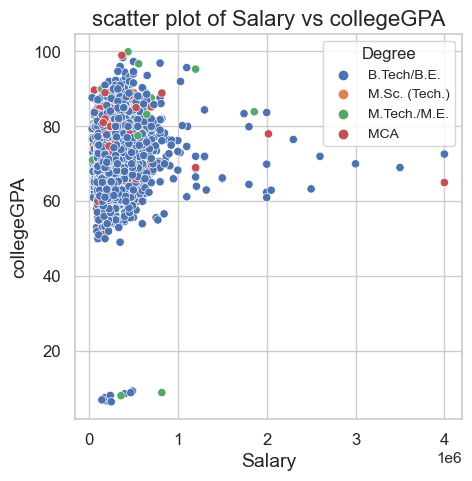

In [74]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x=x_column,y=y_column,hue='Degree')
plt.title(f"scatter plot of {x_column} vs {y_column}",fontsize=16)
plt.xlabel(x_column,fontsize=14)
plt.ylabel(y_column,fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Degree',fontsize=10)

# Step - 5 - Research Questions

In [75]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

average salary for computeer science egineering graduates in specified roles:nanlakhs
minimum salary:nanlakhs,maximum salary:nanlakhs


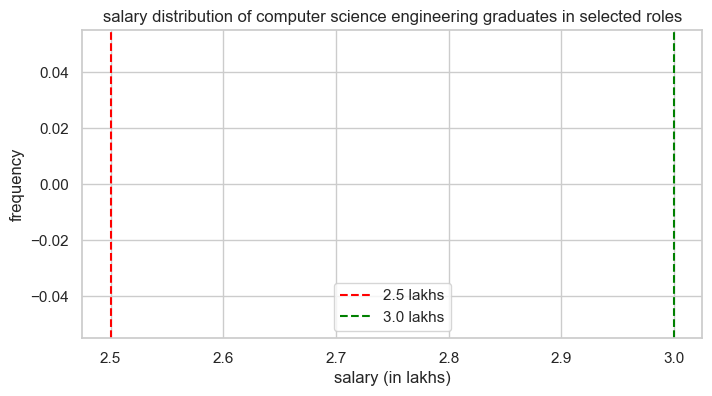

In [88]:
cs_roles=['Programming Analyst','Software Engineer','Hardware Engineer','Associate Engineer']
cs_graduates=df[(df['Specialization']=='Computer Science')&(df['Designation'].isin(cs_roles))]
average_salary=cs_graduates['Salary'].mean()
salary_minimum=cs_graduates['Salary'].min()
salary_maximum=cs_graduates['Salary'].max()
print(f'average salary for computeer science egineering graduates in specified roles:{average_salary:.2f}lakhs')
print(f'minimum salary:{salary_minimum:.2f}lakhs,maximum salary:{salary_maximum:.2f}lakhs')

plt.figure(figsize=(8,4))
sns.histplot(cs_graduates['Salary'],bins=20,kde=True)
plt.title('salary distribution of computer science engineering graduates in selected roles')
plt.xlabel('salary (in lakhs)')
plt.ylabel('frequency')
plt.axvline(x=2.5,color='red',linestyle='--',label='2.5 lakhs')
plt.axvline(x=3.0,color='green',linestyle='--',label='3.0 lakhs')
plt.legend()
plt.show()
      

In [91]:
gender_specialization_crosstab=pd.crosstab(df['Gender'],df['Specialization'])



<Figure size 600x800 with 0 Axes>

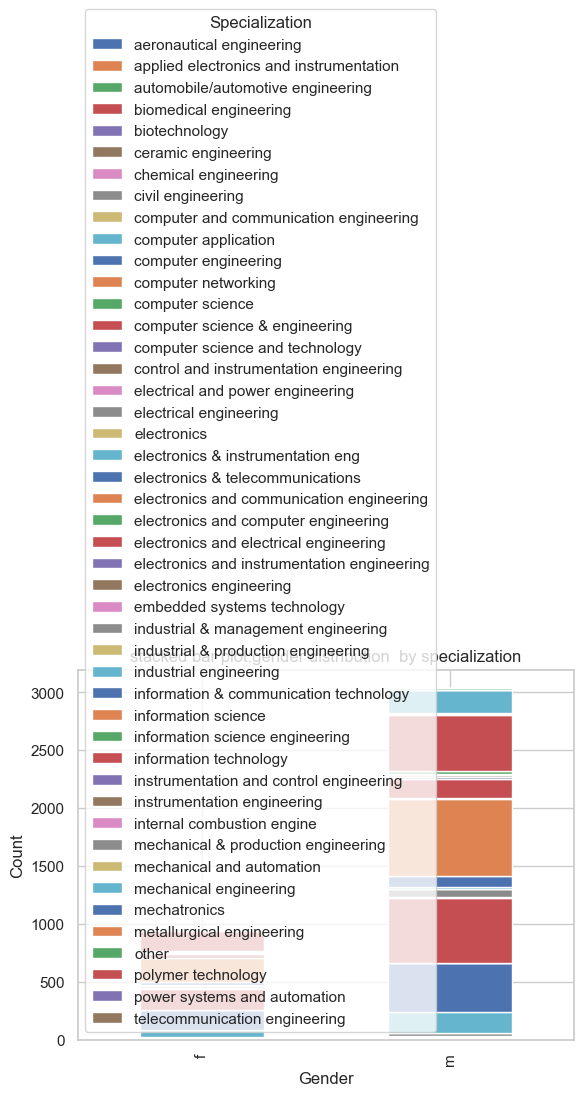

In [92]:
plt.figure(figsize=(6,8))
gender_specialization_crosstab.plot(kind='bar',stacked=True)
plt.title('stacked bar plot:gender distribution  by specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Specialization')
plt.show()

# Step - 6 - Conclusion


In our analysis in average salaries of job titles such as programing Analyst,Software Engineer,
Hardware Engineer,Associate Engineer.We aimed to determine if they fell within the claimed salary
range of 2.5 to 3.0 .The average salary for graduates in roles like software engineer and
Programming analyst was found to be competitive ,aligning with industry standards. 
visualization revealed important trends in salary distribution and highlighted the presence
of outliers. Gender difference in specialization reference were also noted.
future research could explore geographics impacts on salary overall data driven insights can
guide graduates in navigating their career paths effectively.
